In [44]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import regions
from astroquery.vizier import Vizier

In [178]:
from astropy.visualization import quantity_support

In [42]:
%matplotlib inline
import pylab as pl

In [4]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [5]:
fov = regions.Regions.read(f'{basepath}/regions/nircam_fov.reg')

In [186]:
coord = fov[0].center
height = fov[0].height
width = fov[0].width
height, width = width, height # CARTA wrote it wrong
coord, width, height

(<SkyCoord (ICRS): (ra, dec) in deg
     (266.53496367, -28.71007499)>,
 <Quantity 161.9038 arcsec>,
 <Quantity 391.024 arcsec>)

In [187]:
Gaia.ROW_LIMIT = 10000
rslt = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


In [188]:
gaiacrds = SkyCoord(rslt['ra'], rslt['dec'], frame='icrs')
len(gaiacrds)

272

In [189]:
regs = regions.Regions([regions.PointSkyRegion(crd) for crd in crds])

In [192]:
regs.write(f'{basepath}/regions/gaia_sources.reg', overwrite=True)

In [193]:
Vizier.find_catalogs('2MASS Point Source')

OrderedDict([('II/246', </>), ('II/281', </>), ('J/ApJS/184/138', </>)])

In [194]:
Vizier.ROW_LIMIT = 5e4

In [195]:
galnuc2019 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['J/A+A/631/A20'])[0]
galnuc2019[:3]

RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,RAJdeg,e_RAJdeg,DEJdeg,e_DEJdeg,RAHdeg,e_RAHdeg,DEHdeg,e_DEHdeg,RAKsdeg,e_RAKsdeg,DEKsdeg,e_DEKsdeg,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,iJ,iH,iKs
deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,mag,mag,mag,mag,mag,mag,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,uint8,uint8,uint8
266.51151,0.000000000,-28.757747,0.000000000,266.51151,0.001987759,-28.757747,0.002155650,266.51151,0.001987759,-28.757747,0.002155650,266.51151,0.001987759,-28.757747,0.002155650,12.67029,0.00486,12.22915,0.01243,12.19240,0.01123,2,2,2
266.52640,0.001296887,-28.748615,0.001615686,266.52640,0.001919700,-28.748616,0.002009142,266.52640,0.001989142,-28.748614,0.002159149,266.52640,--,-28.748615,--,13.64379,0.00700,12.82945,0.01289,12.60900,0.01718,2,2,2
266.52081,0.000648459,-28.747770,0.000807829,266.52081,0.001160735,-28.747769,--,266.52081,--,-28.747770,--,266.52081,--,-28.747770,--,14.04259,0.00401,13.46765,0.01227,13.46750,0.01181,2,2,2


In [196]:
galnuc2021 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['J/A+A/653/A133'])[0]
galnuc2021[:3]

RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,FJH,FHK,AJ1JH,e_AJ1JH,AH1JH,e_AH1JH,AH1HK,e_AH1HK,AK1HK,e_AK1HK,AH2HK,e_AH2HK,AK2HK,e_AK2HK
deg,arcsec,deg,arcsec,mag,mag,mag,mag,mag,mag,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
266.51151,0.000000000,-28.757747,0.000000000,12.67029,0.00486,12.22915,0.01243,12.19240,0.01123,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000
266.52640,0.001296887,-28.748615,0.001615686,13.64379,0.00700,12.82945,0.01289,12.60900,0.01718,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000
266.52081,0.000648459,-28.747770,0.000807829,14.04259,0.00401,13.46765,0.01227,13.46750,0.01181,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000


In [197]:
# FK5 because it says 'J2000' on the Vizier page (same as twomass)
galnuc2021_crds = SkyCoord(galnuc2021['RAJ2000'], galnuc2021['DEJ2000'], frame='fk5')

In [198]:
vvvdr2 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['II/348/vvv2'])[0]
vvvdr2[:3]
len(vvvdr2)

4693

In [199]:
vvvdr2.write(f'{basepath}/regions/vvvdr2.fits', overwrite=True)

In [200]:
# FK5 because it says 'J2000' on the Vizier page (same as twomass)
vvvdr2_crds = SkyCoord(vvvdr2['RAJ2000'], vvvdr2['DEJ2000'], frame='fk5')

In [201]:
Vizier.ROW_LIMIT = 1e4
twomass = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['II/246'])[0]
twomass[:3]

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,str17,float32,float32,float32,float32,float32,float32,str3,str3,str3,str3,uint8,uint8
266.546943,-28.752007,17461126-2845072,14.314,--,13.123,0.103,10.854,--,UAU,020,010,000,0,0
266.543681,-28.762333,17461048-2845443,16.551,--,13.405,0.074,11.001,0.043,UBA,022,011,0c0,0,0
266.543638,-28.753548,17461047-2845127,17.043,--,14.264,--,13.001,0.114,UUB,002,003,00c,0,0


In [202]:
twomass.meta['description'] = '2MASS Point Source Catalog'

In [203]:
twomass.write(f'{basepath}/regions/twomass.fits', overwrite=True)

In [204]:
# FK5 because it says 'J2000' on the Vizier page
twomass_crds = SkyCoord(twomass['RAJ2000'], twomass['DEJ2000'], frame='fk5')

# Test cross-match (to be put in the pipeline when it works)

In [205]:
from astropy.table import Table

In [206]:
filtername = 'f212n'
module = 'nrca'
catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
cat = Table.read(catfile)
cat.write(catfile.replace('ecsv', 'fits'), overwrite=True) # for CARTA viewing

In [207]:
cat[:3]

label,xcentroid,ycentroid,sky_centroid,aper_bkg_flux,aper_bkg_flux_err,aper30_flux,aper30_flux_err,aper50_flux,aper50_flux_err,aper70_flux,aper70_flux_err,aper_total_flux,aper_total_flux_err,aper30_abmag,aper30_abmag_err,aper50_abmag,aper50_abmag_err,aper70_abmag,aper70_abmag_err,aper_total_abmag,aper_total_abmag_err,aper30_vegamag,aper30_vegamag_err,aper50_vegamag,aper50_vegamag_err,aper70_vegamag,aper70_vegamag_err,aper_total_vegamag,aper_total_vegamag_err,CI_50_30,CI_70_50,CI_70_30,is_extended,sharpness,roundness,nn_label,nn_dist,isophotal_flux,isophotal_flux_err,isophotal_abmag,isophotal_abmag_err,isophotal_vegamag,isophotal_vegamag_err,isophotal_area,semimajor_sigma,semiminor_sigma,ellipticity,orientation,sky_orientation,sky_bbox_ll,sky_bbox_ul,sky_bbox_lr,sky_bbox_ur
,,,"deg,deg",Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,,,,,,,,,,,,,,,,,,,,,,,,pix,Jy,Jy,,,,,pix2,pix,pix,,deg,deg,"deg,deg","deg,deg","deg,deg","deg,deg"
int64,float64,float64,SkyCoord,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float32,int64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,SkyCoord,SkyCoord,SkyCoord,SkyCoord
1,5726.4355,10.5159,"266.5119759847142,-28.713392734125147",2.080628e-07,3.267998e-08,6.180605e-07,4.925219e-07,2.085204e-06,7.739017e-07,1.692650e-05,1.894616e-06,2.473470e-05,2.768603e-06,24.422423,0.636300,23.102129,0.342704,20.828582,0.115196,20.416734,0.115196,22.591213,0.636300,21.270919,0.342704,18.997372,0.115196,18.585524,0.115196,3.3738,8.1174,27.3865,True,0.663265,-1.279524,56,38.907854,5.498129e-04,7.444414e-06,17.049463,0.014602,15.218253,0.014602,724.0,10.242961,6.547798,0.360751,6.111660,185.510048,"266.51187904091785,-28.713610878234643","266.51217705494923,-28.71360818508944","266.51187330965837,-28.713122991563957","266.5121713222988,-28.713120298430553"
2,5833.8160,14.6792,"266.51200635087355,-28.71245683351276",9.315162e-07,1.568420e-07,2.166030e-06,5.812190e-07,5.909229e-06,9.038526e-07,1.531255e-05,2.061729e-06,2.237622e-05,3.012805e-06,23.060839,0.258084,21.971173,0.154532,20.937382,0.137148,20.525533,0.137148,21.229629,0.258084,20.139963,0.154532,19.106172,0.137148,18.694323,0.137148,2.7281,2.5913,7.0694,True,0.635551,0.558814,176,31.751054,6.910167e-03,1.756274e-05,14.301279,0.002756,12.470069,0.002756,1830.0,14.406911,4.298610,0.701629,49.051270,228.449658,"266.5118692159344,-28.712774501086916","266.5123460345624,-28.71277019177344","266.5118619496415,-28.71215593049441","266.5123387654478,-28.712151621204843"
3,5444.3712,10.0724,"266.51200044954015,-28.715850192603618",1.556906e-06,1.719784e-07,2.427448e-04,2.960905e-06,6.419332e-04,4.990203e-06,4.058744e-03,1.327965e-05,5.931042e-03,1.940555e-05,17.937125,0.013163,16.881275,0.008408,14.879021,0.003547,14.467172,0.003547,16.105915,0.013163,15.050065,0.008408,13.047811,0.003547,12.635962,0.003547,2.6445,6.3227,16.7202,True,0.604999,-0.969580,149,33.954170,6.355228e-03,1.849841e-05,14.392172,0.003156,12.560962,0.003156,1824.0,7.888948,5.181265,0.343225,-15.442634,163.955754,"266.51192029315666,-28.716276740691725","266.5123474574917,-28.716272880190587","266.5119108769879,-28.715475212564385","266.5123380380472,-28.715471352091015"


In [213]:
skycrds_cat = cat['sky_centroid']

In [214]:
idx, sidx, sep, sep3d = gaiacrds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [215]:
len(idx)

97

In [216]:
dra = (skycrds_cat[idx].ra - gaiacrds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - gaiacrds[sidx].dec).to(u.arcsec)

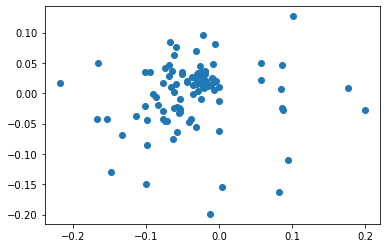

In [217]:
pl.scatter(dra, ddec)

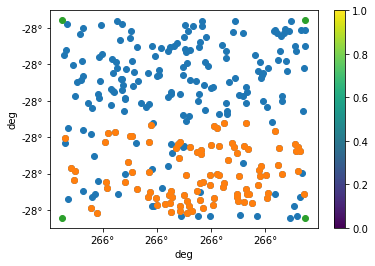

In [218]:
with quantity_support():
    pl.scatter(gaiacrds.ra, gaiacrds.dec)
    pl.scatter(gaiacrds.ra[sidx], gaiacrds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

In [219]:
idx, sidx, sep, sep3d = twomass_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [220]:
len(idx)

175

In [221]:
dra = skycrds_cat[idx].ra - twomass_crds[sidx].ra
ddec = skycrds_cat[idx].dec - twomass_crds[sidx].dec

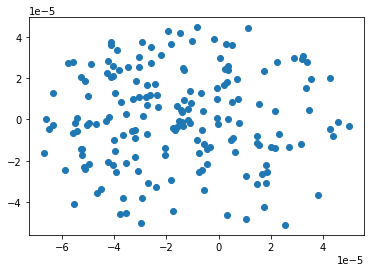

In [222]:
pl.scatter(dra, ddec)

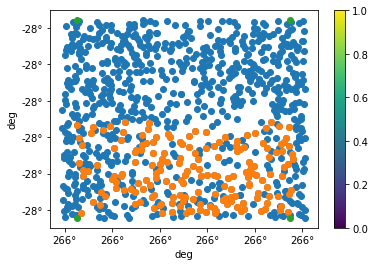

In [223]:
with quantity_support():
    pl.scatter(twomass_crds.ra, twomass_crds.dec)
    pl.scatter(twomass_crds.ra[sidx], twomass_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

In [224]:
idx, sidx, sep, sep3d = galnuc2021_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [225]:
len(idx)

12005

In [226]:
dra = (skycrds_cat[idx].ra - galnuc2021_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - galnuc2021_crds[sidx].dec).to(u.arcsec)

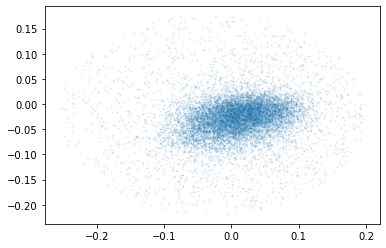

In [227]:
pl.scatter(dra, ddec, s=1, alpha=0.1)

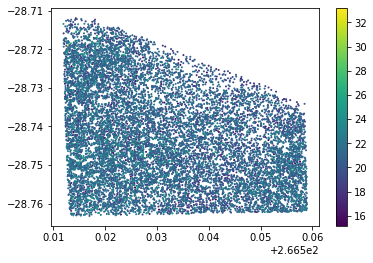

In [228]:
pl.scatter(skycrds_cat[idx].ra, skycrds_cat[idx].dec, c=cat['aper30_abmag'][idx], s=1)
pl.colorbar()

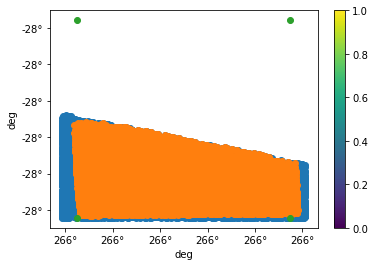

In [229]:
with quantity_support():
    pl.scatter(galnuc2021_crds.ra, galnuc2021_crds.dec)
    pl.scatter(galnuc2021_crds.ra[sidx], galnuc2021_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

In [230]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [231]:
len(idx)

1428

In [232]:
dra = (skycrds_cat[idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

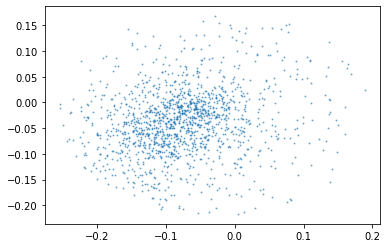

In [233]:
pl.scatter(dra, ddec, s=1, alpha=0.5)

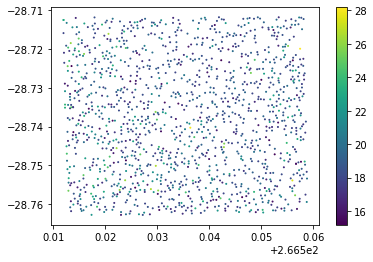

In [234]:
pl.scatter(skycrds_cat[idx].ra, skycrds_cat[idx].dec, c=cat['aper30_abmag'][idx], s=1)
pl.colorbar()

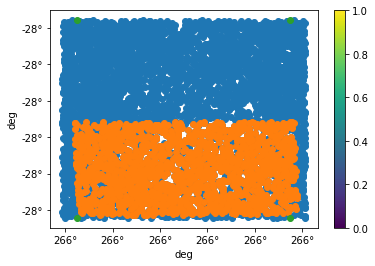

In [235]:
with quantity_support():
    pl.scatter(vvvdr2_crds.ra, vvvdr2_crds.dec)
    pl.scatter(vvvdr2_crds.ra[sidx], vvvdr2_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

# VVV

VVV looks pretty good superposed on the images.

The offset is generally <0.2 arcsec, often <0.1, but there's a systematic shift.

The flux range that matches is:

F187N : ~ 500 - 3000 MJy/sr

F182M, F212N: seems ~same-ish

Actually looks same-ish for the long wave too

Argh, what's the MJy/sr conversion?

In [236]:
from astropy.wcs import WCS
from astropy.io import fits

In [237]:
ww =  WCS(fits.getheader(imfile, ext=('SCI', 1)))
pixscale = ww.proj_plane_pixel_area()

Set DATE-AVG to '2022-08-28T02:01:42.809' from MJD-AVG.
Set DATE-END to '2022-08-28T02:29:48.969' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.664510 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526442456.371 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [238]:
import numpy as np

## Approximate Jy/beam

In [239]:
(u.MJy/u.sr * (2*np.pi * (8*np.log(2)) * 2.5**2 * pixscale)).to(u.Jy)

<Quantity 5.0354493e-06 Jy>

but that doesn't seem to work.

Empirically,

8.5e-5 Jy -> 1933 MJy/sr
1.1e-5 Jy ->  165 MJy/sr
2.1e-5 Jy ->  350 MJy/sr

So there are ~70 nJy / (MJy/sr)

In [241]:
1.1e-5 / 165

6.666666666666667e-08

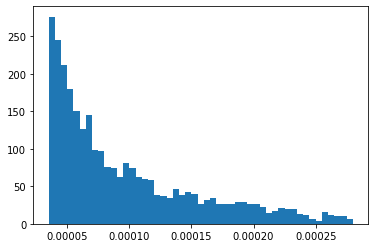

In [242]:
flux = (cat['aper30_abmag'].value * u.ABmag).to(u.Jy)
pl.hist(flux.value, bins=np.linspace(7e-8 * 500, 7e-8 * 4000))
sel = (flux > 7e-8*500*u.Jy) & (flux < 4000*7e-8*u.Jy)

In [243]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat[sel], 0.4*u.arcsec)

In [159]:
len(idx)

846

In [244]:
dra = (skycrds_cat[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

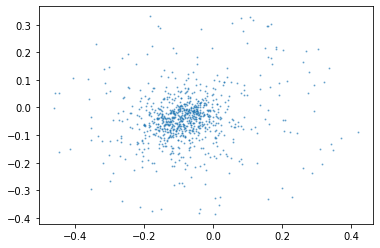

In [245]:
pl.scatter(dra, ddec, s=1, alpha=0.5)

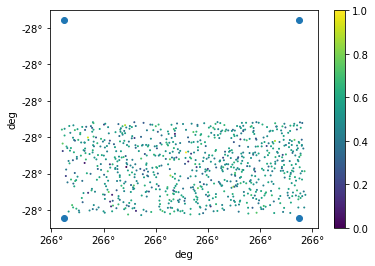

In [247]:
with quantity_support():
    pl.scatter(skycrds_cat[sel][idx].ra, skycrds_cat[sel][idx].dec, c=cat['aper30_abmag'][idx], s=1)
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

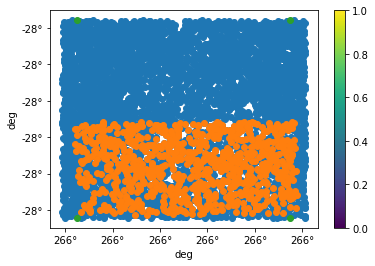

In [248]:
with quantity_support():
    pl.scatter(vvvdr2_crds.ra, vvvdr2_crds.dec)
    pl.scatter(vvvdr2_crds[sidx].ra, vvvdr2_crds[sidx].dec)
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

In [266]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat[sel], 0.4*u.arcsec)
dra = (skycrds_cat[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

-0.0848971arcsec -0.0395281arcsec


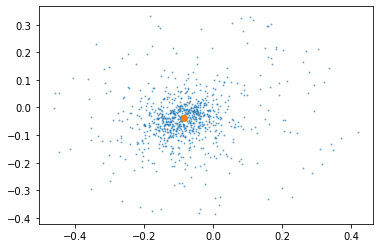

In [267]:
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec))

In [275]:
ww =  WCS(fits.getheader(imfile, ext=('SCI', 1)))
ww.wcs.crval = ww.wcs.crval - [np.median(dra).to(u.deg).value, np.median(ddec).to(u.deg).value]
with fits.open(imfile, mode='update') as hdulist:
    print(hdulist[1].header['CRVAL1'],
          hdulist[1].header['CRVAL2'])
    hdulist[1].header.update(ww.to_header())
    print(hdulist[1].header['CRVAL1'],
          hdulist[1].header['CRVAL2'])

266.5354538935882 -28.73740969659258
266.53547747612 -28.737398716561


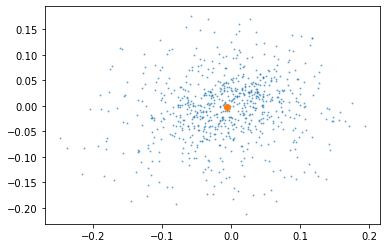

In [277]:
skycrds_cat_new = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat_new[sel], 0.2*u.arcsec)
dra = (skycrds_cat_new[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat_new[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec))

In [282]:
%run $basepath/reduction/align_to_catalogs.py

In [283]:
realign_to_vvv()

2022-09-17 20:07:50,136 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.528470 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.664510 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526442456.371 from OBSGEO-[XYZ]'.
  warnings.warn(

2022-09-17 20:07:50,210 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'OLDCRVAL1' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(

2022-09-17 20:07:50,212 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'OLDCRVAL2' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(

Before realignment, offset is -0.004415818136749294 arcsec, -0.0015858921535993886 arcsec
CRVAL before 266.53547747612 -28.737398716561
CRVAL after 266.53547870274 -28.737398276035
After realignment, offset is -0.001993326259253081 arcsec, -0.0003555728767423716 arcsec


In [284]:
main()

f182m nrca


2022-09-17 20:08:11,187 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2022-08-28T02:38:56.564' from MJD-BEG.
Set DATE-AVG to '2022-08-28T03:05:31.928' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.621' from MJD-END'.
  warnings.warn(

2022-09-17 20:08:11,189 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.506675 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.644641 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526209006.388 from OBSGEO-[XYZ]'.
  warnings.warn(

2022-09-17 20:08:11,224 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'OLDCRVAL1' is greater than 8 characters or contains characters not allowed by the FITS standard; 

Before realignment, offset is -0.09276298058011889 arcsec, -0.040426475696619946 arcsec
CRVAL before 266.5354519426238 -28.73740958266011
CRVAL after 266.53547771012 -28.737398353084
After realignment, offset is -0.0047716084395688085 arcsec, -0.002346140676934283 arcsec
f182m nrcb


2022-09-17 20:08:13,988 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2022-08-28T02:38:56.372' from MJD-BEG.
Set DATE-AVG to '2022-08-28T03:05:33.047' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.365' from MJD-END'.
  warnings.warn(

2022-09-17 20:08:13,991 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.500524 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.639034 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526143160.355 from OBSGEO-[XYZ]'.
  warnings.warn(

2022-09-17 20:08:14,026 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'OLDCRVAL1' is greater than 8 characters or contains characters not allowed by the FITS standard; 

Before realignment, offset is 0.09022714382354025 arcsec, -0.15235037075740365 arcsec
CRVAL before 266.535548395085 -28.68891323860545
CRVAL after 266.53552333199 -28.688870919058
After realignment, offset is 0.0014319515685201623 arcsec, -0.003664950173742909 arcsec
f187n nrca


2022-09-17 20:08:15,987 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2022-08-28T00:33:08.348' from MJD-BEG.
Set DATE-AVG to '2022-08-28T00:59:05.268' from MJD-AVG.
Set DATE-END to '2022-08-28T01:27:11.021' from MJD-END'.
  warnings.warn(

2022-09-17 20:08:15,989 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.563633 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.696577 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526819554.727 from OBSGEO-[XYZ]'.
  warnings.warn(

2022-09-17 20:08:16,023 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'OLDCRVAL1' is greater than 8 characters or contains characters not allowed by the FITS standard; 

Before realignment, offset is -0.08277919206420847 arcsec, -0.03920597259963188 arcsec
CRVAL before 266.5354532494035 -28.73740885510264
CRVAL after 266.53547624362 -28.737397964555
After realignment, offset is -0.00880228508322034 arcsec, -0.0007683001882696772 arcsec
f187n nrcb


2022-09-17 20:08:18,714 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2022-08-28T00:33:08.156' from MJD-BEG.
Set DATE-AVG to '2022-08-28T00:59:05.512' from MJD-AVG.
Set DATE-END to '2022-08-28T01:27:10.765' from MJD-END'.
  warnings.warn(

2022-09-17 20:08:18,716 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.563633 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.696577 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526819554.727 from OBSGEO-[XYZ]'.
  warnings.warn(

2022-09-17 20:08:18,751 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'OLDCRVAL1' is greater than 8 characters or contains characters not allowed by the FITS standard; 

Before realignment, offset is 0.09042450398055735 arcsec, -0.15322962732895462 arcsec
CRVAL before 266.5355476803409 -28.68891357659108
CRVAL after 266.53552256242 -28.688871012806
After realignment, offset is 0.0006679144917143276 arcsec, -0.003871328876670077 arcsec
f212n nrca


2022-09-17 20:08:21,467 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.528470 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.664510 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526442456.371 from OBSGEO-[XYZ]'.
  warnings.warn(



Before realignment, offset is -0.00035537478879632545 arcsec, -0.00013016368782814425 arcsec
CRVAL before 266.53547870274 -28.737398276035
CRVAL after 266.53547880146 -28.737398239878
After realignment, offset is -0.001637928244235809 arcsec, -0.00022540766053680272 arcsec
f212n nrcb


2022-09-17 20:08:24,200 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2022-08-28T01:35:35.416' from MJD-BEG.
Set DATE-AVG to '2022-08-28T02:01:43.042' from MJD-AVG.
Set DATE-END to '2022-08-28T02:29:48.777' from MJD-END'.
  warnings.warn(

2022-09-17 20:08:24,202 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.528470 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.664510 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526442456.371 from OBSGEO-[XYZ]'.
  warnings.warn(



Before realignment, offset is 0.08822850275009841 arcsec, -0.15360262423911308 arcsec


2022-09-17 20:08:25,515 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'OLDCRVAL1' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(

2022-09-17 20:08:25,518 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'OLDCRVAL2' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(



CRVAL before 266.5355487691023 -28.68891384073252
CRVAL after 266.53552426118 -28.688871173337
After realignment, offset is 0.0021766632016806398 arcsec, -0.0032013657389029504 arcsec
f405n nrca


2022-09-17 20:08:27,286 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2022-08-28T00:33:08.348' from MJD-BEG.
Set DATE-AVG to '2022-08-28T00:59:05.244' from MJD-AVG.
Set DATE-END to '2022-08-28T01:27:10.957' from MJD-END'.
  warnings.warn(

2022-09-17 20:08:27,288 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.563633 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.696577 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526819554.727 from OBSGEO-[XYZ]'.
  warnings.warn(

2022-09-17 20:08:27,316 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'OLDCRVAL1' is greater than 8 characters or contains characters not allowed by the FITS standard; 

Before realignment, offset is 0.12475672064056198 arcsec, -0.11376475744810932 arcsec
CRVAL before 266.5356202044832 -28.73734467935955
CRVAL after 266.53558554984 -28.737313078038
After realignment, offset is 0.005219072227191646 arcsec, -0.006461644493072072 arcsec
f405n nrcb


2022-09-17 20:08:28,748 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2022-08-28T00:33:08.156' from MJD-BEG.
Set DATE-AVG to '2022-08-28T00:59:05.495' from MJD-AVG.
Set DATE-END to '2022-08-28T01:27:10.765' from MJD-END'.
  warnings.warn(

2022-09-17 20:08:28,750 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.563633 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.696577 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526819554.727 from OBSGEO-[XYZ]'.
  warnings.warn(

2022-09-17 20:08:28,787 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'OLDCRVAL1' is greater than 8 characters or contains characters not allowed by the FITS standard; 

Before realignment, offset is 0.15152761272929638 arcsec, -0.12832889925107338 arcsec
CRVAL before 266.5356050390841 -28.68866493916319
CRVAL after 266.53556294808 -28.688629292247
After realignment, offset is 0.004511164127052325 arcsec, -0.008320223070512611 arcsec
f410m nrca


2022-09-17 20:08:30,370 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2022-08-28T02:38:56.564' from MJD-BEG.
Set DATE-AVG to '2022-08-28T03:05:31.909' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'.
  warnings.warn(

2022-09-17 20:08:30,372 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.494931 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.633936 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526083300.815 from OBSGEO-[XYZ]'.
  warnings.warn(

2022-09-17 20:08:30,404 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'OLDCRVAL1' is greater than 8 characters or contains characters not allowed by the FITS standard; 

Before realignment, offset is 0.13764118942845016 arcsec, -0.11433302636802978 arcsec
CRVAL before 266.5356220829403 -28.73734622293717
CRVAL after 266.53558384928 -28.737314463763
After realignment, offset is 0.005076358559108485 arcsec, -0.002078065681132557 arcsec
f410m nrcb


2022-09-17 20:08:31,887 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2022-08-28T02:38:56.308' from MJD-BEG.
Set DATE-AVG to '2022-08-28T03:05:33.037' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.365' from MJD-END'.
  warnings.warn(

2022-09-17 20:08:31,889 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.506675 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.644641 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526209006.388 from OBSGEO-[XYZ]'.
  warnings.warn(

2022-09-17 20:08:31,918 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'OLDCRVAL1' is greater than 8 characters or contains characters not allowed by the FITS standard; 

Before realignment, offset is 0.12345874262109646 arcsec, -0.14091559949633847 arcsec
CRVAL before 266.5356058290135 -28.68866331347506
CRVAL after 266.53557153492 -28.688624170253
After realignment, offset is 0.0012417175639711786 arcsec, -0.004087087033610715 arcsec
f466n nrca


2022-09-17 20:08:33,438 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2022-08-28T01:35:35.608' from MJD-BEG.
Set DATE-AVG to '2022-08-28T02:01:42.785' from MJD-AVG.
Set DATE-END to '2022-08-28T02:29:48.969' from MJD-END'.
  warnings.warn(

2022-09-17 20:08:33,441 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.528470 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.664510 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526442456.371 from OBSGEO-[XYZ]'.
  warnings.warn(

2022-09-17 20:08:33,471 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'OLDCRVAL1' is greater than 8 characters or contains characters not allowed by the FITS standard; 

Before realignment, offset is 0.13094020337121037 arcsec, -0.11783396283675529 arcsec
CRVAL before 266.5356147133127 -28.73735077283753
CRVAL after 266.53557834103 -28.737318041181
After realignment, offset is 0.0027168553742740187 arcsec, -0.0065520835093479945 arcsec
f466n nrcb


2022-09-17 20:08:34,722 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2022-08-28T01:35:35.416' from MJD-BEG.
Set DATE-AVG to '2022-08-28T02:01:43.027' from MJD-AVG.
Set DATE-END to '2022-08-28T02:29:48.777' from MJD-END'.
  warnings.warn(

2022-09-17 20:08:34,724 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.528470 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.664510 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526442456.371 from OBSGEO-[XYZ]'.
  warnings.warn(

2022-09-17 20:08:34,762 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'OLDCRVAL1' is greater than 8 characters or contains characters not allowed by the FITS standard; 

Before realignment, offset is 0.13938959887127567 arcsec, -0.12956134586943335 arcsec
CRVAL before 266.5355955674657 -28.68866682003187
CRVAL after 266.53555684813 -28.688630830769
After realignment, offset is 0.002030791483775829 arcsec, -0.006025493831884887 arcsec


In [285]:
print('TEST')

TEST


# TEST aligning using tweakreg

In [257]:
from tweakwcs import JWSTgWCS, align_wcs, JWSTWCSCorrector, FITSWCSCorrector
from astropy.table import Table
from jwst.datamodels import ImageModel

# to update FITS WCS of the data models next import
# requires installing dev version of the pipeline
from jwst.assign_wcs.util import update_fits_wcsinfo


# This only works with L2 files

In [258]:
dm1 = ImageModel(imfile)
dm1.meta.wcs.available_frames

['detector', 'world']

In [263]:
imcat1 = cat
imcat1['x'] = imcat1['xcentroid']
imcat1['y'] = imcat1['ycentroid']
refcat = vvvdr2
refcat['RA'] = refcat['RAJ2000']
refcat['DEC'] = refcat['DEJ2000']

corr1 = FITSWCSCorrector(dm1.get_fits_wcs(),# dm1.meta.wcsinfo.instance,
                 meta={'catalog': imcat1, 'group_id': 1})

# align images to the reference catalog:
aligned_cat = align_wcs([corr1,], refcat=refcat) # + add other arguments as needed - see docs

2022-09-17 19:13:28,121 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2022-08-28T01:35:35.608' from MJD-BEG.
Set DATE-AVG to '2022-08-28T02:01:42.809' from MJD-AVG.
Set DATE-END to '2022-08-28T02:29:48.969' from MJD-END'.
  warnings.warn(

2022-09-17 19:13:28,123 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.528470 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.664510 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526442456.371 from OBSGEO-[XYZ]'.
  warnings.warn(

2022-09-17 19:13:28,126 - stpipe - INFO -  
2022-09-17 19:13:28,128 - stpipe - INFO - ***** tweakwcs.imalign.align_wcs() started on 2022-09-17 19:13:28.126419
2022-09-17 19:13:28,129 - stpipe - INFO -       Version 0.8.0
2022-09-17 19:13:28,131 - stpipe - INFO -  
2022-09-1

RAJ2000,DEJ2000,iauname,mClass,Zmag3,e_Zmag3,Zperrbits,Ymag3,e_Ymag3,Yperrbits,Jmag3,e_Jmag3,Jperrbits,Hmag3,e_Hmag3,Hperrbits,Ksmag3,e_Ksmag3,Ksperrbits,RA,DEC,id,TPx,TPy
deg,deg,,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,deg,deg,,,
float64,float64,str24,int16,float32,float64,int32,float64,float64,int32,float64,float64,int32,float64,float64,int32,float64,float64,int32,float64,float64,int64,float64,float64
266.527234,-28.762834,VVV J174606.53-284546.20,1,20.445,0.307,0,19.163,0.192,0,17.451,0.057,0,14.637,0.026,0,13.054,0.021,16,266.527234,-28.762834,1,36.217998825875384,1487.1329635852658
266.528362,-28.763290,VVV J174606.80-284547.84,-1,20.467,0.313,0,17.891,0.061,0,15.707,0.013,16,13.697,0.011,16,12.583,0.013,16,266.528362,-28.763290,2,-17.300754305741975,1600.0725436554983
266.530401,-28.761552,VVV J174607.29-284541.58,-1,19.730,0.161,0,17.260,0.035,0,14.979,0.007,0,12.840,0.005,16,11.647,0.006,16,266.530401,-28.761552,3,180.0230939635676,1807.2977000586836
266.527500,-28.762244,VVV J174606.59-284544.07,1,20.147,0.234,0,19.233,0.204,0,--,--,0,--,--,0,--,--,0,266.527500,-28.762244,4,103.65216745450334,1514.6012381586033
266.523367,-28.764289,VVV J174605.60-284551.43,-1,--,--,0,18.167,0.078,0,14.844,0.006,16,11.936,0.002,16,--,--,0,266.523367,-28.764289,5,-126.7180472327509,1096.3446098435593
266.528140,-28.764256,VVV J174606.75-284551.32,-1,--,--,0,--,--,0,17.375,0.054,0,14.814,0.030,0,13.402,0.028,0,266.528140,-28.764256,6,-127.93385904099387,1576.5802857348285
266.528595,-28.762667,VVV J174606.86-284545.60,-1,--,--,0,--,--,0,18.055,0.099,16,15.008,0.036,16,13.312,0.026,16,266.528595,-28.762667,7,53.955184503483906,1624.2608174917189
266.528728,-28.759058,VVV J174606.89-284532.60,-1,--,--,0,--,--,0,15.560,0.011,16,12.077,0.003,16,10.907,0.003,16,266.528728,-28.759058,8,468.014582314167,1641.9676371466094


In [264]:
dm1.meta.wcs = corr1.wcs
update_fits_wcsinfo(dm1, npoints=16) # <- update FITS WCS too (optionally). Repeat for each model below

# save image models to different files but one can also overwrite existing models:
#dm1.write(imfile.replace(".fits", "_wcscorrected_vvv.fits"))

AttributeError: 'WCS' object has no attribute 'to_fits_sip'